# Data Exploration

In [1]:
import pandas_datareader.data as web
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns


In [2]:
start=datetime.datetime(2016,1,1)
end=datetime.datetime(2021,1,1)

In [3]:
amazon=web.DataReader("AMZN","yahoo",start,end)
google=web.DataReader("GOOG","yahoo",start,end)
facebook=web.DataReader("fb","yahoo",start,end)

In [4]:
amazon.head()
google.head()
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [5]:
amazon.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
google.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [7]:
facebook.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
facebook.info()
amazon.info()
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pa

In [9]:
facebook.to_csv("fb_stocks.csv")
amazon.to_csv("amazon_stocks.csv")
google.to_csv("google_stocks.csv")

# Lowest close of all the stocks ?

In [10]:
facebook[facebook['Close']==facebook['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-21,95.989998,92.620003,94.910004,94.160004,30518900,94.160004


In [11]:
amazon[amazon['Close']==amazon['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-09,498.380005,474.0,478.01001,482.070007,7077900,482.070007


In [12]:
google[google['Close']==google['Close'].min()]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-27,672.299988,663.283997,671.0,668.26001,2629000,668.26001


In [13]:
facebook=facebook.reset_index()
amazon=amazon.reset_index()
google=google.reset_index()
facebook.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
1,2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2,2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
3,2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
4,2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [14]:
facebook['month'] = pd.DatetimeIndex(facebook['Date']).month 
google['month'] = pd.DatetimeIndex(google['Date']).month 
amazon['month'] = pd.DatetimeIndex(amazon['Date']).month 


# Amazon Monthly Closing

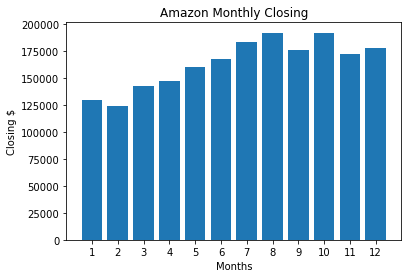

In [15]:
amazon_monthly_closing=amazon.groupby("month").sum()['Close'].reset_index()
plt.title("Amazon Monthly Closing")
plt.bar(amazon_monthly_closing['month'],amazon_monthly_closing['Close'])
plt.xticks(amazon_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Facebook Monthly Closing

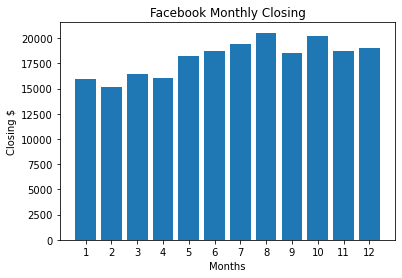

In [16]:
facebook_monthly_closing=facebook.groupby("month").sum()['Close'].reset_index()
plt.title("Facebook Monthly Closing")
plt.bar(facebook_monthly_closing['month'],facebook_monthly_closing['Close'])
plt.xticks(facebook_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Monthly Closing

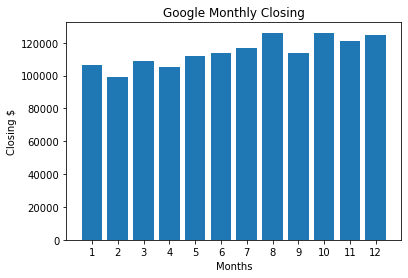

In [17]:
google_monthly_closing=google.groupby("month").sum()['Close'].reset_index()
plt.title("Google Monthly Closing")
plt.bar(google_monthly_closing['month'],google_monthly_closing['Close'])
plt.xticks(google_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Open and Closing Shares

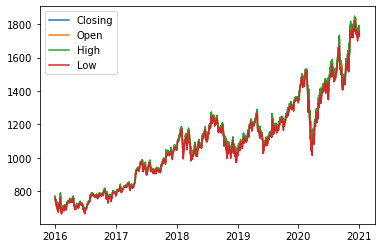

In [18]:
google.set_index("Date")
plt.plot(google['Date'],google['Close'],label ="Closing")
plt.plot(google['Date'],google['Open'],label ="Open")
plt.plot(google['Date'],google['High'],label ="High")
plt.plot(google['Date'],google['Low'],label ="Low")

plt.legend()
plt.show()

In [19]:
google['Open'].iloc[1000:1400].plot

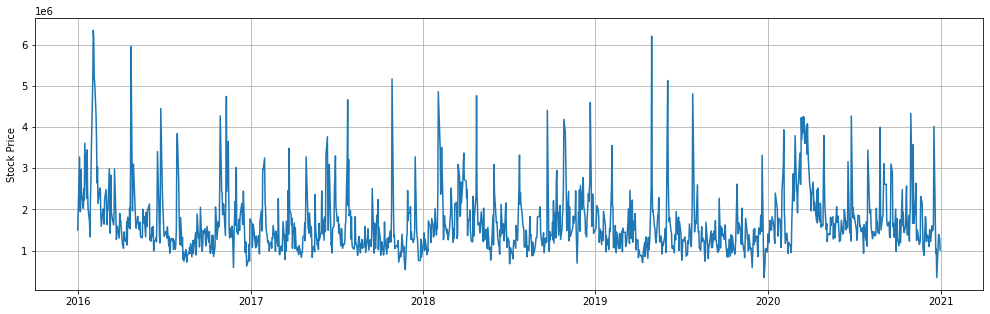

In [20]:
plt.figure(figsize=(17,5))
plt.plot(google['Date'],google['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Facebook Opening and Closing Shares

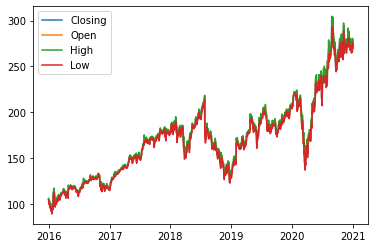

In [21]:
plt.plot(facebook['Date'],facebook['Close'],label ="Closing")
plt.plot(facebook['Date'],facebook['Open'],label ="Open")
plt.plot(facebook['Date'],facebook['High'],label ="High")
plt.plot(facebook['Date'],facebook['Low'],label ="Low")

plt.legend()
plt.show()

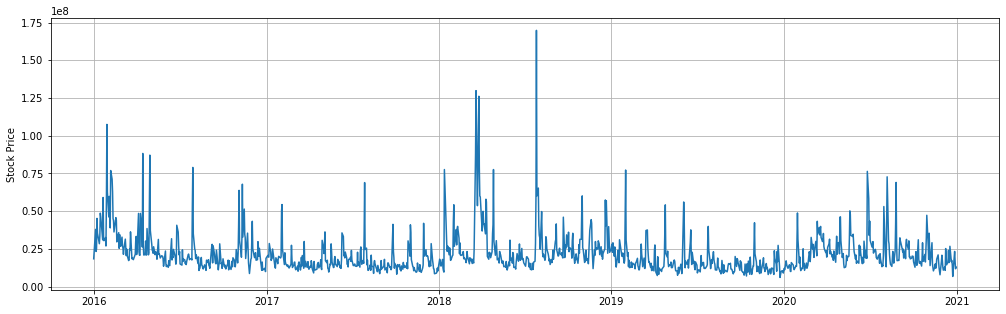

In [22]:
plt.figure(figsize=(17,5))
plt.plot(facebook['Date'],facebook['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Amazon Opening and Closing Shares

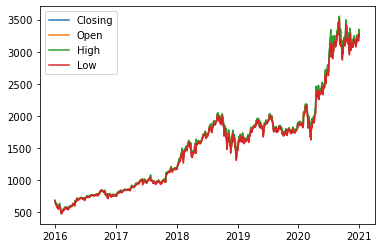

In [23]:
plt.plot(amazon['Date'],amazon['Close'],label ="Closing")
plt.plot(amazon['Date'],amazon['Open'],label ="Open")
plt.plot(amazon['Date'],amazon['High'],label ="High")
plt.plot(amazon['Date'],amazon['Low'],label ="Low")

plt.legend()
plt.show()

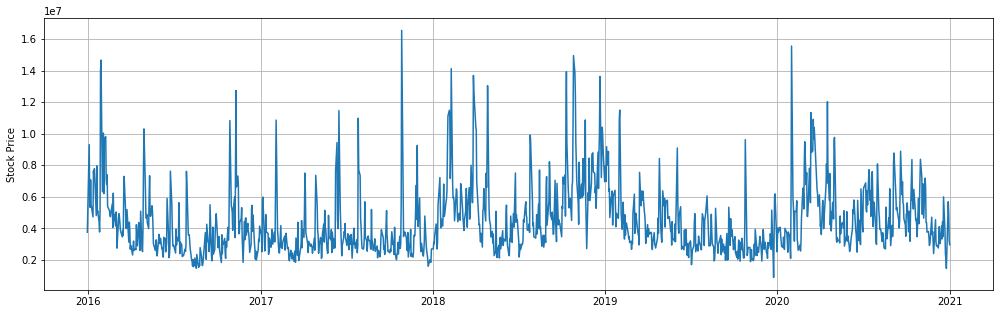

In [24]:
plt.figure(figsize=(17,5))
plt.plot(amazon['Date'],amazon['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

In [25]:
google['Total Traded']=google['Open']*google['Volume']
facebook['Total Traded']=facebook['Open']*facebook['Volume']
amazon['Total Traded']=amazon['Open']*amazon['Volume']

In [26]:
google.set_index("Date",inplace=True)
facebook.set_index("Date",inplace=True)
amazon.set_index("Date",inplace=True)

# Total Traded

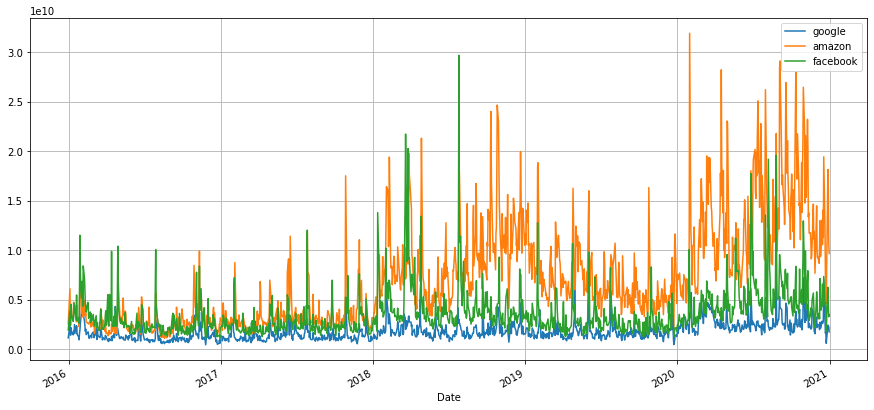

In [27]:
google['Total Traded'].plot(label='google',figsize=(15,7))
amazon['Total Traded'].plot(label='amazon',figsize=(15,7))
facebook['Total Traded'].plot(label='facebook',figsize=(15,7))
plt.legend()
plt.grid()

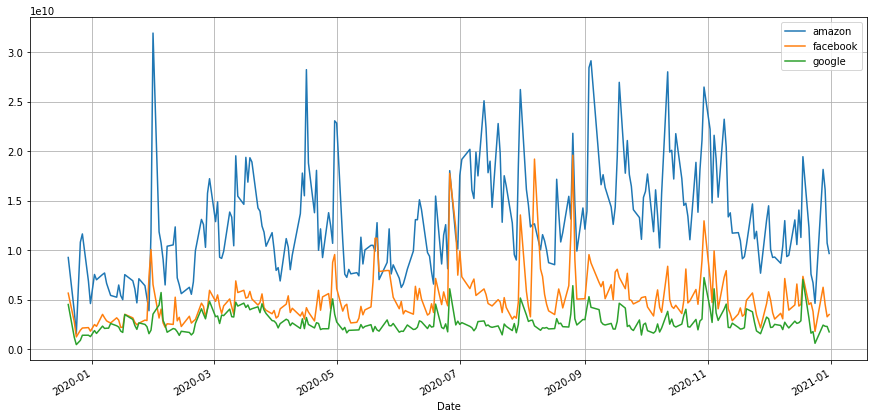

In [28]:
amazon['Total Traded'].iloc[1000:1300].plot(label="amazon",figsize=(15,7))
facebook['Total Traded'].iloc[1000:1300].plot(label="facebook")
google['Total Traded'].iloc[1000:1300].plot(label="google")
plt.legend()
plt.grid()

### Amazon is the most traded share during 2020, because in during lockdown most of people start their own buisness using Amazon FBA and Amazon PL

## Now Check The Relation by using correlation and scatter matrix 

In [29]:
open_share=pd.concat([google['Open'],amazon['Open'],facebook['Open']],axis=1)
open_share.columns=['Google Open', 'Amazon Open','Facebook Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174CEF446A0>,
      dtype=object)

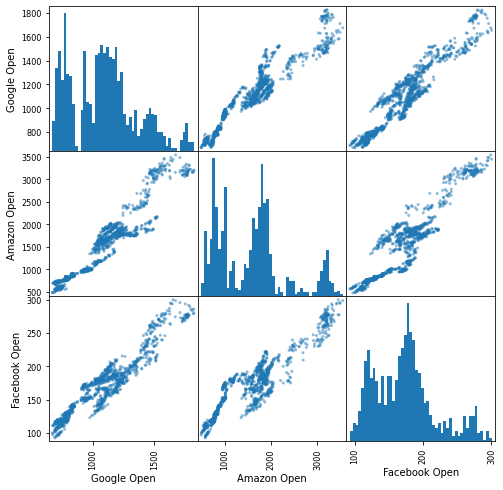

In [30]:
scatter_matrix(open_share,figsize=(8,8),hist_kwds={'bins':50})

## As you see, facebook and google show a possitive good relation between each other

# Correlation of Close stocks

In [31]:
close_share=pd.concat([google['Close'],amazon['Close'],facebook['Close']],axis=1)
close_share.columns=['Google Close', 'Amazon Close','Facebook Close']

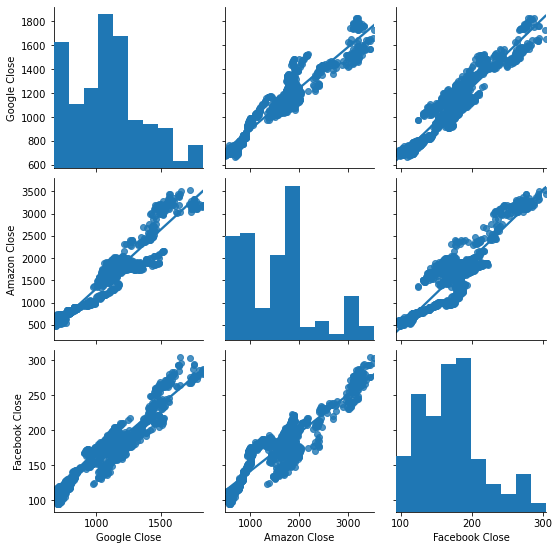

In [32]:
sns.pairplot(close_share, kind='reg')

# Daily Percentage Change

In [33]:
## Or check the volatility of any stock 
facebook['return']=(facebook['Close']/facebook['Close'].shift(1))-1
amazon['return']=(amazon['Close']/amazon['Close'].shift(1))-1
google['return']=(google['Close']/google['Close'].shift(1))-1

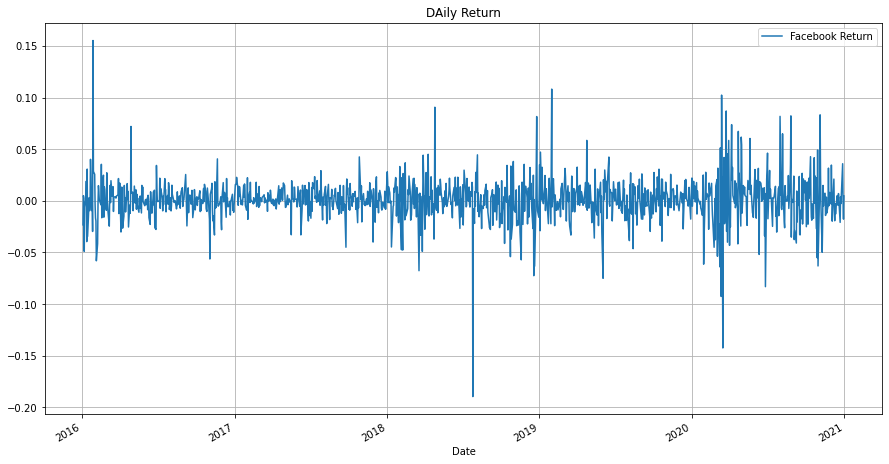

In [34]:
plt.title("DAily Return")
facebook['return'].plot(label='Facebook Return',figsize=(15,8))
plt.legend()
plt.grid()
plt.show()

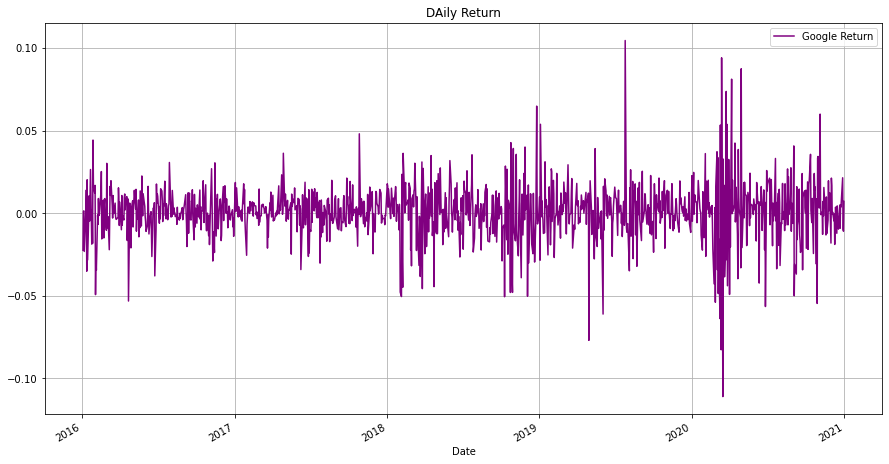

In [35]:
plt.title("DAily Return")
google['return'].plot(label='Google Return',figsize=(15,8),color='purple')
plt.legend()
plt.grid()
plt.show()

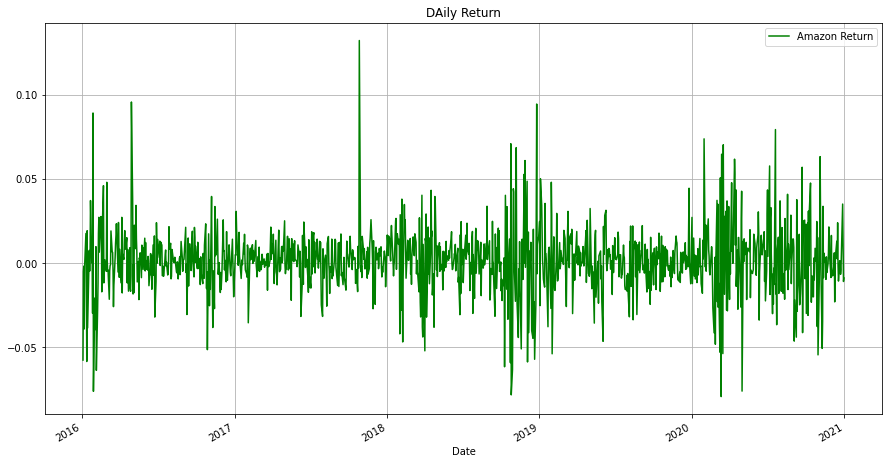

In [36]:
plt.title("DAily Return")
amazon['return'].plot(label='Amazon Return',figsize=(15,8),color="green")
plt.legend()
plt.grid()
plt.show()

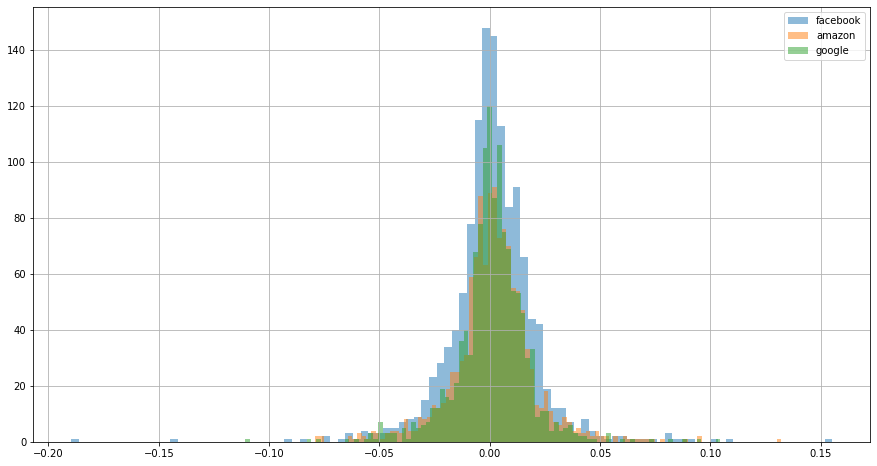

In [37]:
facebook['return'].hist(bins=100, label="facebook",alpha=0.5,figsize=(15,8))
amazon['return'].hist(bins=100, label="amazon",alpha=0.5)
google['return'].hist(bins=100, label="google",alpha=0.5)
plt.legend()

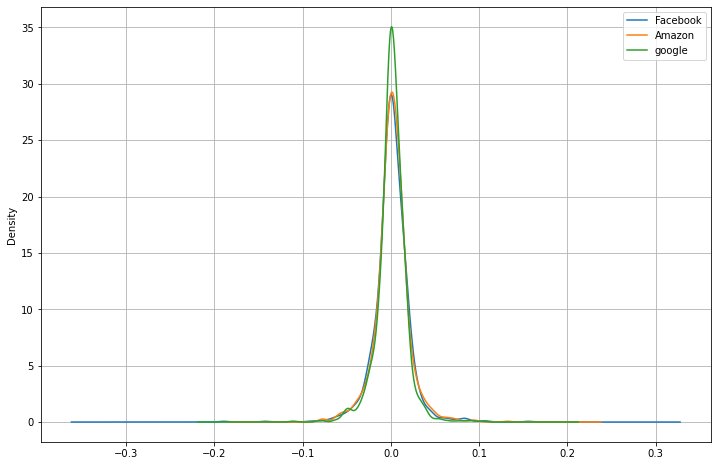

In [38]:
## TO normalize the data you should use KDE = kernal distribution estimation
facebook['return'].plot(kind='kde',label='Facebook',figsize=(12,8))
amazon['return'].plot(kind='kde',label='Amazon',figsize=(12,8))
google['return'].plot(kind='kde',label='google',figsize=(12,8))
plt.legend()
plt.grid()

## Dont be wonder about that spikes of facebook is high in histogram. and here it is down. It shows density and KDE is normalized. So the area of all three stocks are constant 

In [39]:
box=pd.concat([facebook['return'],google['return'],amazon['return']],axis=1)
box.columns=['Facebook Return',"Google Return", "Amazon Return"]
box.head()

,Facebook Return,Google Return,Amazon Return
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,-0.023314,-0.022454,-0.057554
2016-01-05,0.004989,0.000998,-0.005024
2016-01-06,0.002336,0.001400,-0.001799
2016-01-07,-0.049043,-0.023170,-0.039058


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000174CF26DD30>,
      dtype=object)

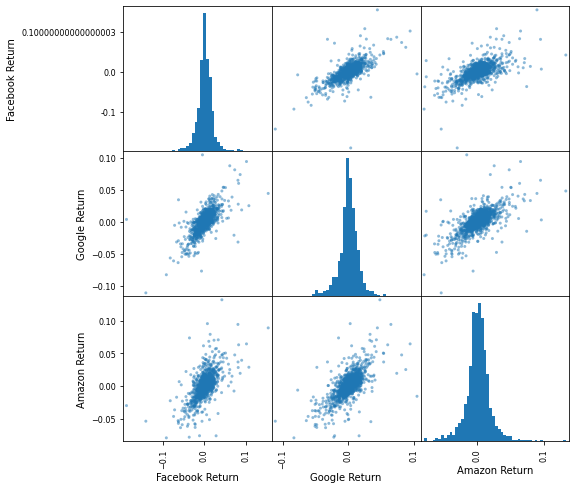

In [40]:
scatter_matrix(box,figsize=(8,8),hist_kwds={'bins':50})

# Cumulative Return 

### we use cumulative return for capture the long term investment. if the cumulative return is greater than 1 you gain profit otherwise you lose it.

In [41]:
facebook['Cumulative Return']=(1+facebook['return']).cumprod()
google['Cumulative Return']=(1+google['return']).cumprod()
amazon['Cumulative Return']=(1+amazon['return']).cumprod()

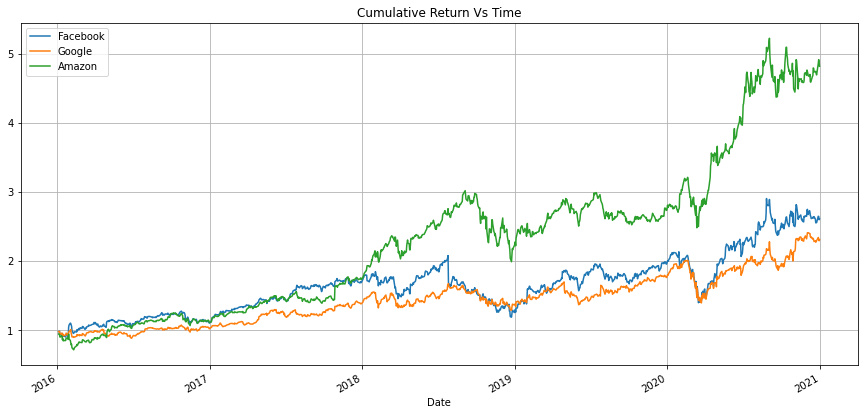

In [42]:
plt.title("Cumulative Return Vs Time")
facebook['Cumulative Return'].plot(label="Facebook",figsize=(15,7))
google['Cumulative Return'].plot(label="Google")
amazon['Cumulative Return'].plot(label="Amazon")
plt.legend()
plt.grid()

# Linear Regression

In [43]:
google.info()
facebook.info()
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               1260 non-null   float64
 1   Low                1260 non-null   float64
 2   Open               1260 non-null   float64
 3   Close              1260 non-null   float64
 4   Volume             1260 non-null   int64  
 5   Adj Close          1260 non-null   float64
 6   month              1260 non-null   int64  
 7   Total Traded       1260 non-null   float64
 8   return             1259 non-null   float64
 9   Cumulative Return  1259 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 148.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   High               12

In [44]:
print('Google')
google.describe()

Google


,High,Low,Open,Close,Volume,Adj Close,month,Total Traded,return,Cumulative Return
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.000000,1.260000e+03,1259.000000,1259.000000
mean,1099.784473,1079.066688,1089.166991,1089.820828,1.671474e+06,1089.820828,6.540476,1.811205e+09,0.000803,1.436437
std,272.744474,265.430152,268.633949,269.154882,7.683336e+05,269.154882,3.425705,9.235060e+08,0.016615,0.354602
min,672.299988,663.059998,667.849976,668.260010,3.468000e+05,668.260010,1.000000,4.489263e+08,-0.111008,0.880587
25%,841.675003,830.449982,835.310013,836.532501,1.209450e+06,836.532501,4.000000,1.174966e+09,-0.005775,1.102935
50%,1094.207520,1071.102478,1083.015015,1082.619995,1.466950e+06,1082.619995,7.000000,1.570546e+09,0.001044,1.426787
75%,1241.125000,1219.107513,1229.325012,1230.235046,1.888775e+06,1230.235046,10.000000,2.189701e+09,0.008853,1.621521
max,1847.199951,1822.650024,1824.520020,1827.989990,6.348100e+06,1827.989990,12.000000,7.355295e+09,0.104485,2.408800


In [45]:
print('Facebook')
facebook.describe()

Facebook


,High,Low,Open,Close,Volume,Adj Close,month,Total Traded,return,Cumulative Return
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.000000,1.260000e+03,1259.000000,1259.000000
mean,174.147278,170.199532,172.199905,172.271103,2.171309e+07,172.271103,6.540476,3.662127e+09,0.000979,1.646520
std,45.034932,43.582205,44.299734,44.324040,1.359768e+07,44.324040,3.425705,2.384801e+09,0.020756,0.423281
min,95.000000,89.370003,92.830002,94.160004,6.046300e+06,94.160004,1.000000,1.047777e+09,-0.189609,0.899675
25%,138.520004,136.307499,137.134995,137.645000,1.365820e+07,137.645000,4.000000,2.245003e+09,-0.007414,1.316883
50%,173.275002,169.565002,171.834999,171.525002,1.810800e+07,171.525002,7.000000,3.022224e+09,0.001165,1.639404
75%,194.135002,189.709999,192.232498,192.402496,2.455810e+07,192.402496,10.000000,4.275770e+09,0.010851,1.838381
max,304.670013,293.049988,300.160004,303.910004,1.698037e+08,303.910004,12.000000,2.969697e+10,0.155214,2.903784


In [46]:
print('Amazon')
amazon.describe()

Amazon


,High,Low,Open,Close,Volume,Adj Close,month,Total Traded,return,Cumulative Return
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.000000,1.260000e+03,1259.000000,1259.000000
mean,1573.147999,1538.305373,1556.970056,1556.484864,4.417075e+06,1556.484864,6.540476,7.073070e+09,0.001433,2.303902
std,756.921427,734.674516,746.816806,745.852498,2.154108e+06,745.852498,3.425705,5.061116e+09,0.019164,1.103338
min,493.500000,474.000000,478.010010,482.070007,8.813000e+05,482.070007,1.000000,1.114523e+09,-0.079221,0.713237
25%,892.704987,882.529999,884.875000,886.072479,2.922450e+06,886.072479,4.000000,3.065441e+09,-0.006807,1.315340
50%,1623.735046,1590.880005,1604.005005,1605.509949,3.825700e+06,1605.509949,7.000000,5.550778e+09,0.001434,2.379011
75%,1900.012543,1864.625000,1885.282501,1884.370026,5.270925e+06,1884.370026,10.000000,9.635489e+09,0.010627,2.788087
max,3552.250000,3486.689941,3547.000000,3531.449951,1.656500e+07,3531.449951,12.000000,3.193585e+10,0.132164,5.224888


In [47]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

4.14.1


In [48]:
#libraries for ploting Graph
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
import numpy as np

#for offline plotting
init_notebook_mode(connected=True)

In [49]:
#Resettin g all the dataset index from date to numeric form
amazon=amazon.reset_index()
google=google.reset_index()
facebook=facebook.reset_index()
#Setting the layout of all the company for ploting
amazon_layout=go.Layout(
    title='Stock Price of Amazon',
    xaxis=dict(
        title='Date',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    )
)
google_layout=go.Layout(
    title='Stock Price of Google',
    xaxis=dict(
        title='Date',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    )
)
facebook_layout=go.Layout(
    title='Stock Price of Facebook',
    xaxis=dict(
        title='Date',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
        family='Courier New, monospace',
        size=18,
        color='#7f7f7f'
        )
    )
)


In [50]:
#ploting amazon data using the layout
amazon_data=[{'x':amazon['Date'],'y':amazon['Close']}]
amazon_plot=go.Figure(data=amazon_data,layout=amazon_layout)
iplot(amazon_plot)

In [51]:
#ploting google data using the layout
google_data=[{'x':google['Date'],'y':google['Close']}]
google_plot=go.Figure(data=google_data,layout=google_layout)
iplot(google_plot)

In [52]:
#ploting facebook data using the layout
facebook_data=[{'x':facebook['Date'],'y':facebook['Close']}]
facebook_plot=go.Figure(data=facebook_data,layout=facebook_layout)
iplot(facebook_plot)

In [53]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for prepocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score  

In [54]:
#Splitting the dataset into train and test sets for linear regression
#for amazon
amazon_X =np.array(amazon.index).reshape(-1,1)
amazon_Y =amazon['Close']
#for training we are taking 80%(0.8) of the whole dataset and assigning a random state of 101
amazon_X_train,amazon_X_test,amazon_Y_train,amazon_Y_test=train_test_split(amazon_X,amazon_Y,test_size=0.8,random_state=101)

In [55]:
#Splitting the dataset into train and test sets for linear regression
#for google
google_X =np.array(google.index).reshape(-1,1)
google_Y =google['Close']
#for training we are taking 80%(0.8) of the whole dataset and assigning a random state of 101
google_X_train,google_X_test,google_Y_train,google_Y_test=train_test_split(google_X,google_Y,test_size=0.8,random_state=101)

In [56]:
#Splitting the dataset into train and test sets for linear regression
#for facebook
facebook_X =np.array(facebook.index).reshape(-1,1)
facebook_Y =facebook['Close']
#for training we are taking 80%(0.8) of the whole dataset and assigning a random state of 101
facebook_X_train,facebook_X_test,facebook_Y_train,facebook_Y_test=train_test_split(facebook_X,facebook_Y,test_size=0.8,random_state=101)

In [57]:
#feature scaling 
amazon_scaler=StandardScaler().fit(amazon_X_train)
google_scaler=StandardScaler().fit(google_X_train)
facebook_scaler=StandardScaler().fit(facebook_X_train)
#standardize scaler is mandatory for any machine learning 
#they tend to behave badly if the dataset are not distributed properly


In [58]:
#importing linear Regression library to perform modeling
from sklearn.linear_model import LinearRegression

In [59]:
#create a linear model
#provide x and y train value for the linear regression model
amazon_lm = LinearRegression()
amazon_lm.fit(amazon_X_train,amazon_Y_train)

google_lm = LinearRegression()
google_lm.fit(google_X_train,google_Y_train)

facebook_lm = LinearRegression()
facebook_lm.fit(facebook_X_train,facebook_Y_train)

LinearRegression()

In [60]:
#plot actual and predicted values for train dataset using scatter plot
#actual values
amazon_trace0 = go.Scatter(
    x=amazon_X_train.T[0],
    y=amazon_Y_train,
    mode='markers',
    name='Actual'
)
google_trace0 = go.Scatter(
    x=google_X_train.T[0],
    y=google_Y_train,
    mode='markers',
    name='Actual'
)
facebook_trace0 = go.Scatter(
    x=facebook_X_train.T[0],
    y=facebook_Y_train,
    mode='markers',
    name='Actual'
)
#predicted Values
amazon_trace1 = go.Scatter(
    x=amazon_X_train.T[0],
    y=amazon_lm.predict(amazon_X_train).T,
    mode='lines',
    name='Predicted'
)
google_trace1 = go.Scatter(
    x=google_X_train.T[0],
    y=google_lm.predict(google_X_train).T,
    mode='lines',
    name='Predicted'
)
facebook_trace1 = go.Scatter(
    x=facebook_X_train.T[0],
    y=facebook_lm.predict(facebook_X_train).T,
    mode='lines',
    name='Predicted'
)
#combining the actual and predicted value in a variable
#for amazon
amazon_data=[amazon_trace0,amazon_trace1]
amazon_layout.xaxis.title.text='Day'
amazon_plot2=go.Figure(data=amazon_data,layout=amazon_layout)
#for google
google_data=[google_trace0,google_trace1]
google_layout.xaxis.title.text='Day'
google_plot2=go.Figure(data=google_data,layout=google_layout)
#for facebook
facebook_data=[facebook_trace0,facebook_trace1]
facebook_layout.xaxis.title.text='Day'
facebook_plot2=go.Figure(data=facebook_data,layout=facebook_layout)

In [61]:
iplot(amazon_plot2)
iplot(google_plot2)
iplot(facebook_plot2)

In [62]:
#Calculate scores for the model evaluation
# we will find the error using r2 error and the mean squar error on our trained model
print(' Amazon Predicted scores'.center(50))
amazon_scores=f'''
{'Metric'.ljust(10)} {'Train'.center(20)} {'Test'.center(20)}
{'r2_score'.ljust(10)} {r2_score(amazon_Y_train,amazon_lm.predict(amazon_X_train))} \t {r2_score(amazon_Y_test,amazon_lm.predict(amazon_X_test))}
{'MSE'.ljust(10)} {mse(amazon_Y_train,amazon_lm.predict(amazon_X_train))} \t {mse(amazon_Y_test,amazon_lm.predict(amazon_X_test))}
'''
print(amazon_scores)

print(' Google Predicted scores'.center(50))
google_scores=f'''
{'Metric'.ljust(10)} {'Train'.center(20)} {'Test'.center(20)}
{'r2_score'.ljust(10)} {r2_score(google_Y_train,google_lm.predict(google_X_train))} \t {r2_score(google_Y_test,google_lm.predict(google_X_test))}
{'MSE'.ljust(10)} {mse(google_Y_train,google_lm.predict(google_X_train))} \t {mse(google_Y_test,google_lm.predict(google_X_test))}
'''
print(google_scores)

print(' Facebook Predicted scores'.center(50))
facebook_scores=f'''
{'Metric'.ljust(10)} {'Train'.center(20)} {'Test'.center(20)}
{'r2_score'.ljust(10)} {r2_score(facebook_Y_train,facebook_lm.predict(facebook_X_train))} \t {r2_score(facebook_Y_test,facebook_lm.predict(facebook_X_test))}
{'MSE'.ljust(10)} {mse(facebook_Y_train,facebook_lm.predict(facebook_X_train))} \t {mse(facebook_Y_test,facebook_lm.predict(facebook_X_test))}
'''
print(facebook_scores)

              Amazon Predicted scores             

Metric            Train                 Test        
r2_score   0.8739057706864323 	 0.8735813556226095
MSE        69838.22580426346 	 70318.32364804555

              Google Predicted scores             

Metric            Train                 Test        
r2_score   0.8992669114349598 	 0.8841378650102822
MSE        7289.271495794161 	 8387.464160938096

             Facebook Predicted scores            

Metric            Train                 Test        
r2_score   0.7896974591695884 	 0.7386964207704373
MSE        412.1924069316361 	 513.1511894083718



# Using LSTM For prediction

In [63]:
gogle_close=google.reset_index()['Close']
amzn_close=amazon.reset_index()['Close']
fb_close=facebook.reset_index()['Close']

## Google Closing Stocks


In [64]:
gogle_close.isna().sum()

0

In [65]:
gogle_closing=MinMaxScaler(feature_range=(0,1))
gogle_close=gogle_closing.fit_transform(np.array(gogle_close).reshape(-1,1))

In [66]:
gogle_close # you see the differnce before and after transformation. You can see that the values are now 
# in between 0 and 1. It is very necessary step to normalize your data to applying any model.

array([[0.07813887],
       [0.06344582],
       [0.06408389],
       ...,
       [0.94027056],
       [0.92371503],
       [0.93437267]])

In [67]:
gogle_training_size=int(len(gogle_close)*0.65) # if you take 65% of data into training and remaining 35% into testing
gogle_test_size=len(gogle_close)-gogle_training_size
gogle_train_data,gogle_test_data=gogle_close[0:gogle_training_size,:],gogle_close[gogle_training_size:len(gogle_close),:1]

In [68]:
def create_dataset(dataset,time_step=1):
    X_data_gogle,Y_data_gogle=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        X_data_gogle.append(a)
        Y_data_gogle.append(dataset[i+time_step,0])
    return np.array(X_data_gogle),np.array(Y_data_gogle)    

In [69]:
time_step=100
gogle_X_train,gogle_Y_train=create_dataset(gogle_train_data,time_step)
gogle_X_test,gogle_Y_test=create_dataset(gogle_test_data,time_step)

In [70]:
print(gogle_X_test.shape)
print(gogle_X_train.shape)

(340, 100)
(718, 100)


In [71]:
# Now reshape your data into 3 dimensional because it is neccessary to make your data 3 dimensional
gogle_X_train=gogle_X_train.reshape(gogle_X_train.shape[0],gogle_X_train.shape[1],1)
gogle_X_test=gogle_X_test.reshape(gogle_X_test.shape[0],gogle_X_test.shape[1],1)

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [73]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')


In [74]:
model.fit(gogle_X_train,gogle_Y_train,validation_data=(gogle_X_test,gogle_Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 12s 407ms/step - loss: 0.0440 - val_loss: 0.0572
Epoch 2/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0061 - val_loss: 0.0093
Epoch 3/100
12/12 [==============================] - 2s 143ms/step - loss: 0.0033 - val_loss: 0.0168
Epoch 4/100
12/12 [==============================] - 2s 157ms/step - loss: 0.0014 - val_loss: 0.0085
Epoch 5/100
12/12 [==============================] - 2s 141ms/step - loss: 0.0011 - val_loss: 0.0049
Epoch 6/100
12/12 [==============================] - 2s 139ms/step - loss: 9.3459e-04 - val_loss: 0.0054
Epoch 7/100
12/12 [==============================] - 2s 143ms/step - loss: 8.4713e-04 - val_loss: 0.0059
Epoch 8/100
12/12 [==============================] - 2s 136ms/step - loss: 9.5582e-04 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 2s 136ms/step - loss: 8.9903e-04 - val_loss: 0.0053
Epoch 10/100
12/12 [==============================] - 2s 145ms/step - loss

In [75]:
import tensorflow as tf

In [76]:
gogle_train_predict=model.predict(gogle_X_train)
gogle_test_predict=model.predict(gogle_X_test)

In [77]:
gogle_train_predict=gogle_closing.inverse_transform(gogle_train_predict)
gogle_test_predict=gogle_closing.inverse_transform(gogle_test_predict)


# Train Predict

In [78]:
import math

math.sqrt(mse(gogle_Y_train,gogle_train_predict))

980.699826960617

# Test Predict

In [79]:
math.sqrt(mse(gogle_Y_test,gogle_test_predict))

1409.3942483374544

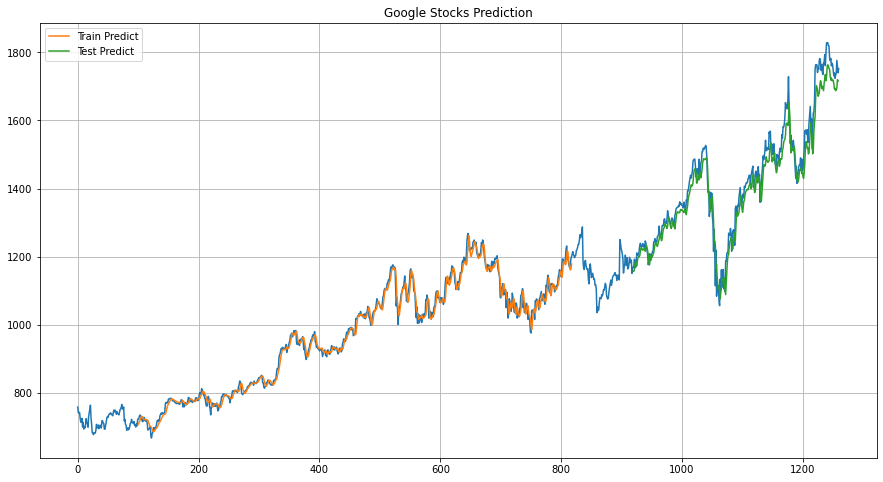

In [80]:
look_back=100
trainPredictPlot=np.empty_like(gogle_close)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(gogle_train_predict)+look_back,:]=gogle_train_predict
testPredictPlot=np.empty_like(gogle_close)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(gogle_train_predict)+(look_back*2)+1:len(gogle_close)-1,:]=gogle_test_predict
plt.figure(figsize=(15,8))
plt.title("Google Stocks Prediction")
plt.plot(gogle_closing.inverse_transform(gogle_close))
plt.plot(trainPredictPlot,label="Train Predict", )
plt.plot(testPredictPlot,label="Test Predict")
plt.legend()
plt.grid()
plt.show()




# Amazon Stocks Prediction

In [81]:
amzn_closing=MinMaxScaler(feature_range=(0,1))
amzn_close=amzn_closing.fit_transform(np.array(amzn_close).reshape(-1,1))

In [82]:
amzn_training_size=int(len(amzn_close)*0.65) # if you take 65% of data into training and remaining 35% into testing
amzn_test_size=len(amzn_close)-amzn_training_size
amzn_train_data,amzn_test_data=amzn_close[0:amzn_training_size,:],amzn_close[amzn_training_size:len(amzn_close),:1]

In [83]:
def amzn_create_dataset(dataset,time_step=1):
    X_data_amzn,Y_data_amzn=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        X_data_amzn.append(a)
        Y_data_amzn.append(dataset[i+time_step,0])
    return np.array(X_data_amzn),np.array(Y_data_amzn)    

In [84]:
time_step=100
amzn_X_train,amzn_Y_train=amzn_create_dataset(amzn_train_data,time_step)
amzn_X_test,amzn_Y_test=amzn_create_dataset(amzn_test_data,time_step)

In [85]:
amzn_X_train=amzn_X_train.reshape(amzn_X_train.shape[0],amzn_X_train.shape[1],1)
amzn_X_test=amzn_X_test.reshape(amzn_X_test.shape[0],amzn_X_test.shape[1],1)

In [86]:
model.fit(amzn_X_train,amzn_Y_train,validation_data=(amzn_X_test,amzn_Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 144ms/step - loss: 9.6509e-05 - val_loss: 4.1471e-04
Epoch 2/100
12/12 [==============================] - 1s 124ms/step - loss: 1.0029e-04 - val_loss: 8.2876e-04
Epoch 3/100
12/12 [==============================] - 1s 124ms/step - loss: 1.0733e-04 - val_loss: 0.0015
Epoch 4/100
12/12 [==============================] - 2s 139ms/step - loss: 1.0080e-04 - val_loss: 7.8214e-04
Epoch 5/100
12/12 [==============================] - 2s 141ms/step - loss: 9.1377e-05 - val_loss: 4.4945e-04
Epoch 6/100
12/12 [==============================] - 2s 147ms/step - loss: 1.2344e-04 - val_loss: 6.2497e-04
Epoch 7/100
12/12 [==============================] - 2s 144ms/step - loss: 1.1692e-04 - val_loss: 0.0019
Epoch 8/100
12/12 [==============================] - 2s 141ms/step - loss: 1.0991e-04 - val_loss: 5.6610e-04
Epoch 9/100
12/12 [==============================] - 2s 141ms/step - loss: 1.0399e-04 - val_loss: 6.8306e-04
Epoch 10/100
12/12 [=======

In [87]:
amzn_train_predict=model.predict(amzn_X_train)
amzn_test_predict=model.predict(amzn_X_test)


In [88]:
amzn_train_predict=amzn_closing.inverse_transform(amzn_train_predict)
amzn_test_predict=amzn_closing.inverse_transform(amzn_test_predict)


In [89]:
import math

math.sqrt(mse(amzn_Y_train,amzn_train_predict))

1294.8729367632075

In [90]:
math.sqrt(mse(amzn_Y_test,amzn_test_predict))

2458.8373717143113

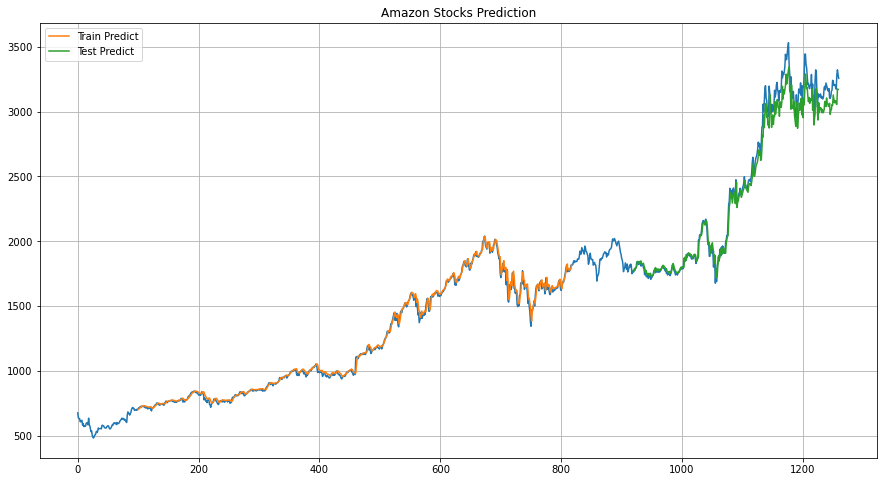

In [91]:
look_back=100
trainPredictPlot=np.empty_like(amzn_close)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(amzn_train_predict)+look_back,:]=amzn_train_predict
testPredictPlot=np.empty_like(amzn_close)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(amzn_train_predict)+(look_back*2)+1:len(amzn_close)-1,:]=amzn_test_predict
plt.figure(figsize=(15,8))
plt.title("Amazon Stocks Prediction")
plt.plot(amzn_closing.inverse_transform(amzn_close))
plt.plot(trainPredictPlot,label="Train Predict", )
plt.plot(testPredictPlot,label="Test Predict")
plt.legend()
plt.grid()
plt.show()




Facebook Stocks Prediction

In [92]:
fb_closing=MinMaxScaler(feature_range=(0,1))
fb_close=fb_closing.fit_transform(np.array(fb_close).reshape(-1,1))

In [93]:
fb_training_size=int(len(fb_close)*0.65) # if you take 65% of data into training and remaining 35% into testing
fb_test_size=len(fb_close)-fb_training_size
fb_train_data,fb_test_data=fb_close[0:fb_training_size,:],fb_close[fb_training_size:len(fb_close),:1]

In [94]:
def fb_create_dataset(dataset,time_step=1):
    X_data_fb,Y_data_fb=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0]
        X_data_fb.append(a)
        Y_data_fb.append(dataset[i+time_step,0])
    return np.array(X_data_fb),np.array(Y_data_fb)    

In [95]:
time_step=100
fb_X_train,fb_Y_train=fb_create_dataset(fb_train_data,time_step)
fb_X_test,fb_Y_test=fb_create_dataset(fb_test_data,time_step)

In [96]:
fb_X_train=fb_X_train.reshape(fb_X_train.shape[0],fb_X_train.shape[1],1)
fb_X_test=fb_X_test.reshape(fb_X_test.shape[0],fb_X_test.shape[1],1)

In [97]:
model.fit(fb_X_train,fb_Y_train,validation_data=(fb_X_test,fb_Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 151ms/step - loss: 2.5259e-04 - val_loss: 0.0021
Epoch 2/100
12/12 [==============================] - 2s 150ms/step - loss: 2.3161e-04 - val_loss: 0.0011
Epoch 3/100
12/12 [==============================] - 2s 144ms/step - loss: 2.4094e-04 - val_loss: 0.0018
Epoch 4/100
12/12 [==============================] - 2s 141ms/step - loss: 2.6526e-04 - val_loss: 0.0032
Epoch 5/100
12/12 [==============================] - 2s 140ms/step - loss: 3.0361e-04 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 2s 147ms/step - loss: 2.5099e-04 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 2s 143ms/step - loss: 2.2936e-04 - val_loss: 8.7701e-04
Epoch 8/100
12/12 [==============================] - 2s 140ms/step - loss: 3.0267e-04 - val_loss: 9.0223e-04
Epoch 9/100
12/12 [==============================] - 2s 140ms/step - loss: 2.6387e-04 - val_loss: 9.7222e-04
Epoch 10/100
12/12 [=======================

In [98]:
fb_train_predict=model.predict(fb_X_train)
fb_test_predict=model.predict(fb_X_test)

In [99]:
fb_train_predict=fb_closing.inverse_transform(fb_train_predict)
fb_test_predict=fb_closing.inverse_transform(fb_test_predict)

In [100]:
math.sqrt(mse(fb_Y_train,fb_train_predict))

155.44888603526775

In [101]:
math.sqrt(mse(fb_Y_test,fb_test_predict))

217.56567833207023

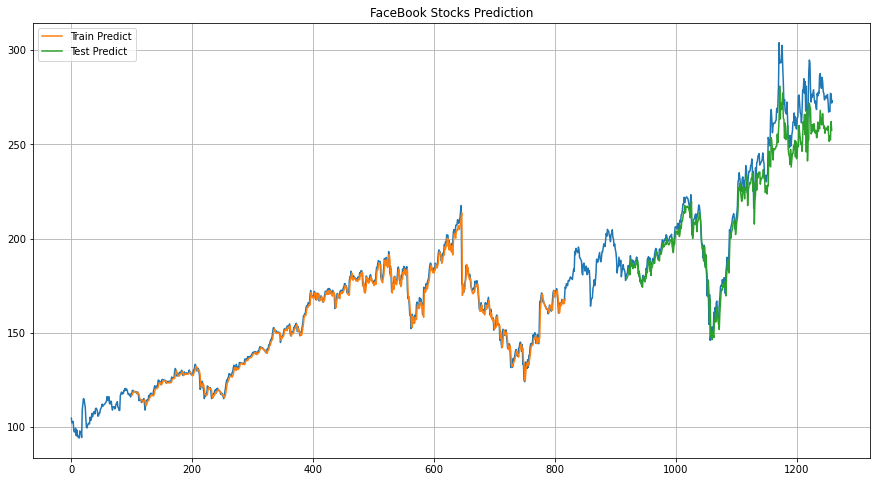

In [102]:
look_back=100
trainPredictPlot=np.empty_like(fb_close)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(fb_train_predict)+look_back,:]=fb_train_predict
testPredictPlot=np.empty_like(fb_close)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(fb_train_predict)+(look_back*2)+1:len(fb_close)-1,:]=fb_test_predict
plt.figure(figsize=(15,8))
plt.title("FaceBook Stocks Prediction")
plt.plot(fb_closing.inverse_transform(fb_close))
plt.plot(trainPredictPlot,label="Train Predict", )
plt.plot(testPredictPlot,label="Test Predict")
plt.legend()
plt.grid()
plt.show()